# <font color = 'green'>Simple linear regression</font>

In this note book i am going through simple linear regression.It is the easiest regression model we use it when there is only on independent variable.The formula for simple linear regression is 

$y = b_{0} + b_{1} * x_{1}$



---


*   $b_{0}$ is constant (y-intercept)
*   $b_{1}$ is co-efficient (slope)


Here the co-efficient decides how much a unit difference in independent varible gonna effect the dependent variable

**In this notebook i am  going to work on a sallary dataset where i am going to predict what is sallary of a person based on his experience**


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score

sns.set_style({'xtick.bottom':False,
              'ytick.left':False,
               'axes.spines.top':False,
               'axes.spines.bottom':False,
               'axes.spines.left':False,
               'axes.spines.right':False,               
              })

In [0]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA

**Lets look at descriptive statastics**

In [0]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [0]:
df.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

**We have data for 30 employees**



*   The average sallary from the data is 76003
*   The average years of experience from the data is 5

**Since median < mean we can say the data is mostly right skewed or positivly skewed.So there are chances of outliers in the data**

Lets plot the data and see



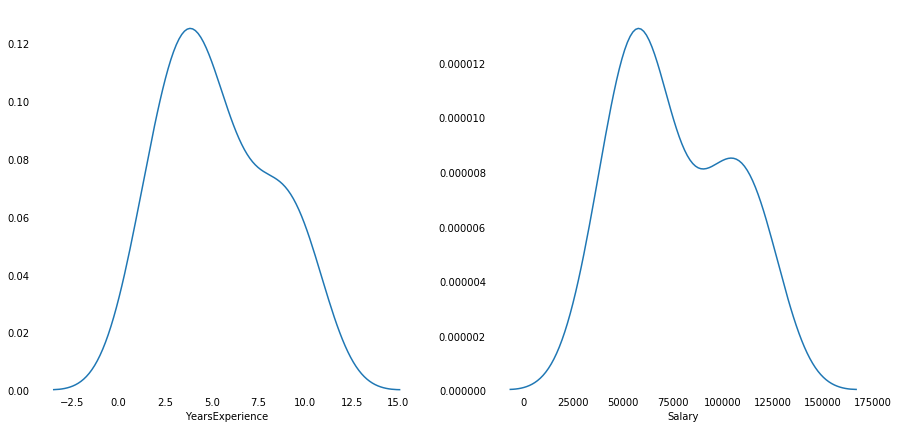

In [0]:
fig,(ax1,ax2 )= plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.distplot(df['YearsExperience'],kde=True,hist=False,bins=30,ax=ax1)
sns.distplot(df['Salary'],kde=True,hist=False,bins=30,ax=ax2)

**Looks like our data is close to normal we might not have toomany outliers**

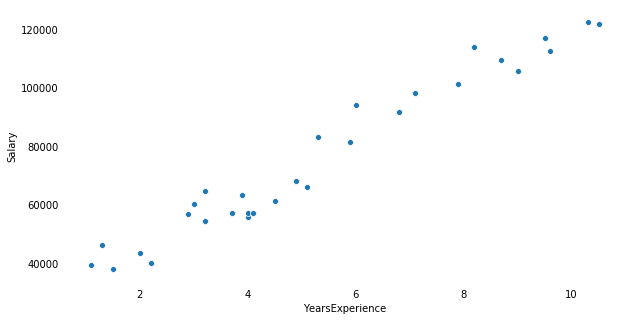

In [0]:
fig,ax1= plt.subplots(figsize=(10,5))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'],ax=ax1)

**dependednt variable and independent variable have linear relationship**

**It dosen't look like we have any outliers**



---

**Before developing a model.We need to make sure data meets the assumptions of regression analysis**



1.   Linearity
2.   No endogeneity (Can verify after developing the model)
3.   Homoscedasity (Can verify after developing the model)
4.   No Autocorrelation
5.   No multicollinearity

## Linearity

There should be a linear relationship between Dependent variable and Independent variable

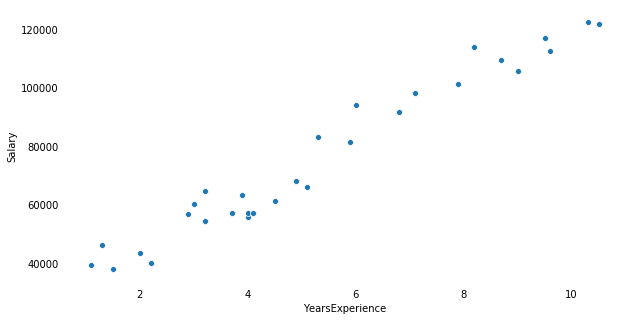

In [0]:
fig,ax1= plt.subplots(figsize=(10,5))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'],ax=ax1)

## No multicollinearity

Independent variables should not be correlated

Since we have only one Independent variable there is no need of verifying this assumption

## No Autocorrelation

Ther should not be correaltion between residual terms.Autocorrelation mainly occurs in timeseries data

In [0]:
x = df['YearsExperience'].values
y = df['Salary'].values

In [0]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()

In [0]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           1.14e-20
Time:                        16:02:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Looks like there is slight auto correlation**

**Simle linear regression using Sklearn**

In [0]:
#Train Test Split data
X = df['YearsExperience'].values
y = df['Salary'].values
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [0]:
X.shape

(30, 1)

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lin_reg.predict(X_test)

In [0]:
y_train.shape

(24,)

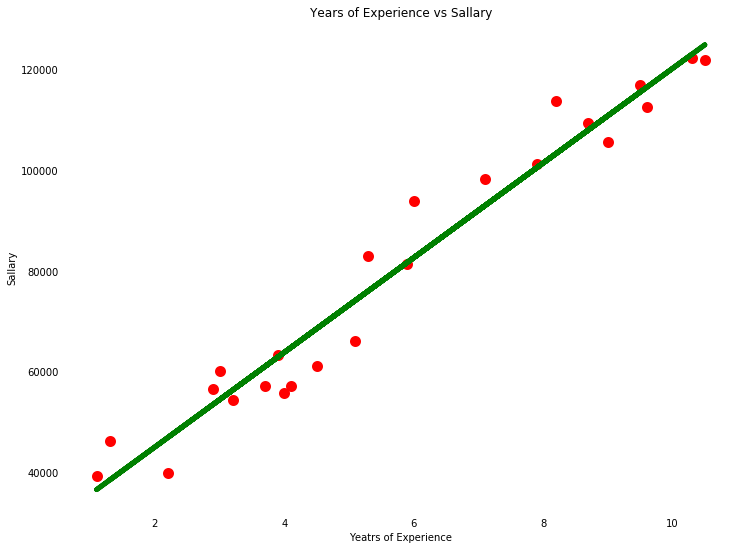

In [0]:
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.scatter(X_train,y_train,color = 'red',linewidths=5)
plt.plot(X_train,lin_reg.predict(X_train),color = 'green',linewidth=5)
plt.xlabel('Yeatrs of Experience')
plt.ylabel('Sallary')
plt.title('Years of Experience vs Sallary')
plt.show()

In [0]:
residuals = y_test - y_pred

## Homoscedascity

Residuals must be normally distrubuted

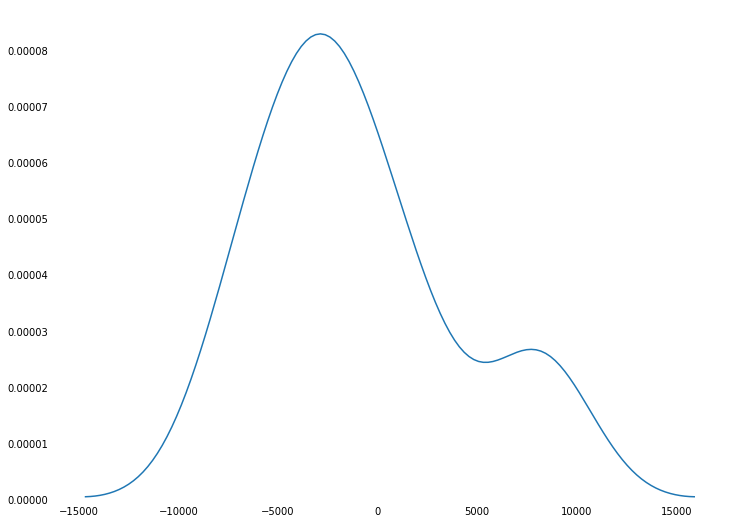

In [0]:
sns.distplot(residuals,kde=True,hist=False)

## No ndogenity

Residuals and Independent varibles must not be correlated

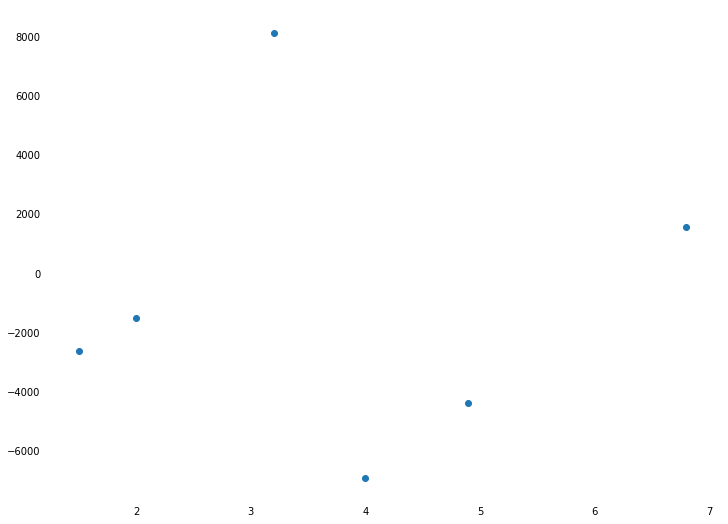

In [0]:
plt.scatter(x=X_test,y=residuals)

**They dont look correlated**

In [0]:
mse = mean_squared_error(y_test,y_pred)
mse_train = mean_squared_error(y_train,lin_reg.predict(X_train))

rmse = np.sqrt(mse)
rmse_train = np.sqrt(mse_train)

print(f'Rmse Test: {rmse}')
print(f'Rmse Train: {rmse_train}')

Rmse Test: 4899.345758619312
Rmse Train: 5757.947054430878


**On average our model is off by 10,000 and it is also slightly underfitting**

**Now since we made sure all the assumptions are true let's check how our model is working.Lets see what sallary our model is going to predict for a person with 6 years of experience**

In [0]:
check = np.array(7.1)
check = check.reshape(-1,1)
lin_reg.predict(check)

array([92992.46902862])

In [0]:
df[df['YearsExperience'] == 7.1]

,YearsExperience,Salary
21,7.1,98273.0


**Looks like it isnt that bad afterall**